Here, we will combine Ferromagnetic ("FM"), Antiferromagnetic ("AFM") and Ferrimagnetic ("FiM") to a single class: "Magnetic"

In [1]:
import pandas as pd

df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

#visualizing the data
print("Data Overview:")
df.head()         # First 5 rows
df.tail()         # Last 5 rows
df.sample(8)      # Random 8 rows


Data Overview:


,material_id,formula,band_gap,ordering,numberofelements,density_atomic,elements,volume,nsites,composition,...,symmetry,structure,efermi,cbm,vbm,formation_energy_per_atom,energy_above_hull,is_gap_direct,is_stable,parsed_elements
29442,mp-1261,EuZn,0.0000,FM,2,26.181975,"[Element Eu, Element Zn]",52.363950,2,Eu1 Zn1,...,crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,Full Formula (Eu1 Zn1)\nReduced Formula: EuZn\...,2.487270,NaN,NaN,-0.257694,0.000000,False,True,"['Eu', 'Zn']"
100686,mp-4081,TaCu3Se4,1.5980,NM,3,22.756351,"[Element Cu, Element Se, Element Ta]",182.050806,8,Ta1 Cu3 Se4,...,crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,Full Formula (Ta1 Cu3 Se4)\nReduced Formula: T...,2.820673,4.2149,2.6169,-0.595983,0.000000,False,True,"['Cu', 'Se', 'Ta']"
30137,mp-1649,Fe3Pt,0.0000,FM,2,13.192603,"[Element Fe, Element Pt]",52.770411,4,Fe3 Pt1,...,crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,Full Formula (Fe3 Pt1)\nReduced Formula: Fe3Pt...,5.696067,NaN,NaN,-0.072919,0.043079,False,False,"['Fe', 'Pt']"
72567,mp-1024963,TbCo2B2C,0.0000,FM,4,10.789732,"[Element B, Element C, Element Co, Element Tb]",64.738393,6,Tb1 Co2 B2 C1,...,crystal_system=<CrystalSystem.tet: 'Tetragonal...,Full Formula (Tb1 Co2 B2 C1)\nReduced Formula:...,5.550756,NaN,NaN,-0.430334,0.025208,False,False,"['B', 'C', 'Co', 'Tb']"
8901,mp-1037565,NaMg30FeO32,3.0685,FM,4,9.676048,"[Element Fe, Element Mg, Element Na, Element O]",619.267103,64,Na1 Mg30 Fe1 O32,...,crystal_system=<CrystalSystem.tet: 'Tetragonal...,Full Formula (Na1 Mg30 Fe1 O32)\nReduced Formu...,3.930021,6.9985,3.9300,-2.945326,0.015456,False,False,"['Fe', 'Mg', 'Na', 'O']"
100263,mp-2221129,Sr4MgFe2(SO3)2,1.2129,FM,5,16.252053,"[Element Fe, Element Mg, Element O, Element S,...",243.780794,15,Sr4 Mg1 Fe2 S2 O6,...,crystal_system=<CrystalSystem.tet: 'Tetragonal...,Full Formula (Sr4 Mg1 Fe2 S2 O6)\nReduced Form...,2.934609,4.1239,2.9110,-2.178444,0.296019,False,False,"['Fe', 'Mg', 'O', 'S', 'Sr']"
81410,mp-1045774,YCo4(CuO4)3,0.0000,FM,4,9.640979,"[Element Co, Element Cu, Element O, Element Y]",192.819589,20,Y1 Co4 Cu3 O12,...,crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,Full Formula (Y1 Co4 Cu3 O12)\nReduced Formula...,4.159570,NaN,NaN,-1.459903,0.002768,False,False,"['Co', 'Cu', 'O', 'Y']"
86431,mp-1227453,CaU2(BO5)2,2.0258,NM,4,15.542608,"[Element B, Element Ca, Element O, Element U]",466.278233,30,Ca2 U4 B4 O20,...,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (Ca2 U4 B4 O20)\nReduced Formula:...,0.901785,2.9275,0.9017,-3.395426,0.000000,False,True,"['B', 'Ca', 'O', 'U']"


Now, we do SVM on selected features. Combine "FM", "AFM" and "FiM" to "Magnetic"

First, without Categorical features to compare.

Train size: 33723, Validation size: 11242, Test size: 11242
4-fold Stratified CV (F1_macro) scores on training set: [0.80539516 0.8067307  0.80253678 0.81271907]
Mean CV F1_macro: 0.8068454290410991
Validation Classification Report:
              precision    recall  f1-score   support

    Magnetic       0.88      0.82      0.85      7135
          NM       0.72      0.81      0.76      4107

    accuracy                           0.82     11242
   macro avg       0.80      0.81      0.81     11242
weighted avg       0.82      0.82      0.82     11242



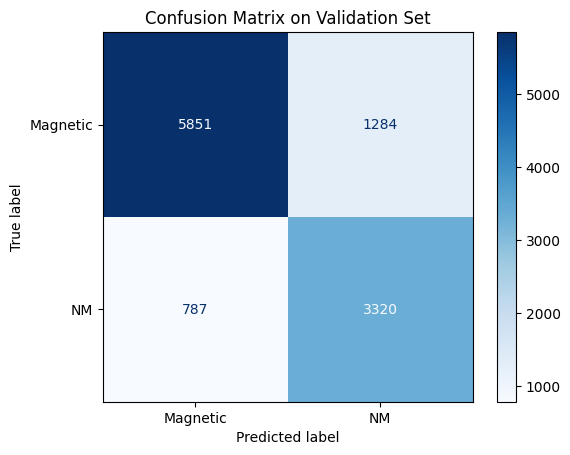

In [2]:
#Without Categorical features.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Drop NA and combine FM + AFM + FiM → Magnetic ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom"]

df = df.dropna(subset=numerical_features + ["ordering"])
df["ordering"] = df["ordering"].replace({"FM": "Magnetic", "FiM": "Magnetic", "AFM": "Magnetic"})

# === 3. Combine features ===
X = df[numerical_features].reset_index(drop=True)

# === 4. Encode labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 5. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 6. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma=0.01, class_weight="balanced"))
])

# === 7. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 8. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 9. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# === 10. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


We do hyperparameter tuning using Numerical Features alone to consume time and storage.

Train size: 33723, Validation size: 11242, Test size: 11242
Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 1.6min
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 1.6min
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 1.6min
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 1.6min
[CV] END ...........................svm__C=0.1, svm__gamma=1; total time= 1.9min
[CV] END ...........................svm__C=0.1, svm__gamma=1; total time= 1.9min
[CV] END ...........................svm__C=0.1, svm__gamma=1; total time= 1.9min
[CV] END ...........................svm__C=0.1, svm__gamma=1; total time= 1.9min
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time= 1.9min
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time= 1.9min
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total t

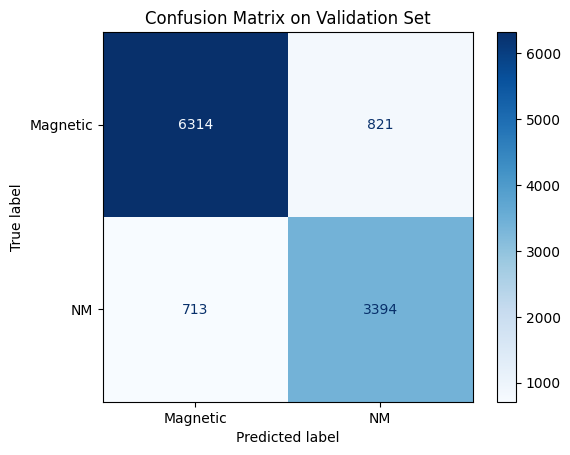

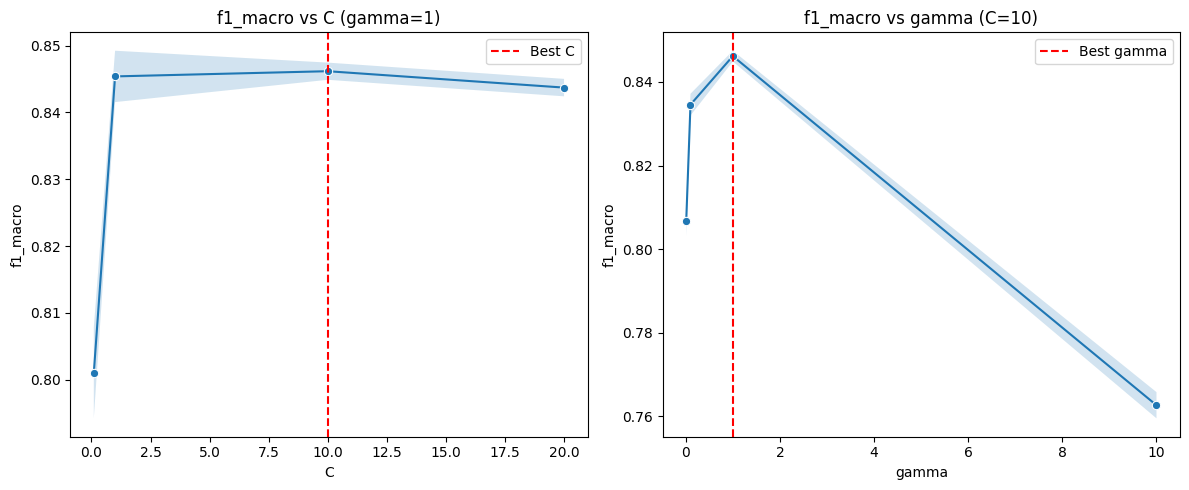

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Drop NA and combine FM + FiM → FerroLike ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom"]
df = df.dropna(subset=numerical_features + ["ordering"])
df["ordering"] = df["ordering"].replace({"FM": "Magnetic", "FiM": "Magnetic", "AFM": "Magnetic"})

# === 3. Features and Labels ===
X = df[numerical_features].reset_index(drop=True)
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 4. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 5. SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", class_weight="balanced"))
])

# === 6. Hyperparameter Grid ===
param_grid = {
    "svm__C": [0.1, 1, 10, 20],
    "svm__gamma": [0.01, 0.1, 1, 10]
}

# === 7. GridSearchCV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

# === 8. Best Model ===
print("Best Parameters:", grid_search.best_params_)
print("Best CV f1_macro Score:", grid_search.best_score_)

# === 9. Evaluate on Validation Set ===
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()

# === 10. Plot f1_macro vs C and gamma ===
results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12, 5))

# --- Plot 1: f1_macro vs C (best gamma fixed) ---
plt.subplot(1, 2, 1)
gamma_fixed = grid_search.best_params_["svm__gamma"]
subset_C = results_df[results_df["param_svm__gamma"] == gamma_fixed]
sns.lineplot(x="param_svm__C", y="mean_test_score", data=subset_C, marker="o")
plt.fill_between(
    subset_C["param_svm__C"].astype(float),
    subset_C["mean_test_score"] - subset_C["std_test_score"],
    subset_C["mean_test_score"] + subset_C["std_test_score"],
    alpha=0.2
)
plt.axvline(grid_search.best_params_["svm__C"], color="red", linestyle="--", label="Best C")
plt.title(f"f1_macro vs C (gamma={gamma_fixed})")
plt.xlabel("C")
plt.ylabel("f1_macro")
plt.legend()

# --- Plot 2: f1_macro vs gamma (best C fixed) ---
plt.subplot(1, 2, 2)
C_fixed = grid_search.best_params_["svm__C"]
subset_gamma = results_df[results_df["param_svm__C"] == C_fixed]
sns.lineplot(x="param_svm__gamma", y="mean_test_score", data=subset_gamma, marker="o")
plt.fill_between(
    subset_gamma["param_svm__gamma"].astype(float),
    subset_gamma["mean_test_score"] - subset_gamma["std_test_score"],
    subset_gamma["mean_test_score"] + subset_gamma["std_test_score"],
    alpha=0.2
)
plt.axvline(grid_search.best_params_["svm__gamma"], color="red", linestyle="--", label="Best gamma")
plt.title(f"f1_macro vs gamma (C={C_fixed})")
plt.xlabel("gamma")
plt.ylabel("f1_macro")
plt.legend()

plt.tight_layout()
plt.show()


We now include Categorical Variables like "Elements" and "Crystal_system". We do one-hot encoding for "Elements" using MultiLabelBinarizer which gives a value 1 if the material has that element, 0 otherwise. We use LabelEncoder for "Crystal_system" which labels different systems with integers. We have a small number of "Crystal_system".

We use the tuned parameters above and some others to see if it gives the best performance even when we include Categorical variables.

Train size: 33723, Validation size: 11242, Test size: 11242
4-fold Stratified CV (F1_macro) scores on training set: [0.56016962 0.55964879 0.56600495 0.55825197]
Mean CV F1_macro: 0.5610188318407996
Validation Classification Report:
              precision    recall  f1-score   support

    Magnetic       0.69      0.99      0.81      7135
          NM       0.93      0.21      0.35      4107

    accuracy                           0.71     11242
   macro avg       0.81      0.60      0.58     11242
weighted avg       0.77      0.71      0.64     11242



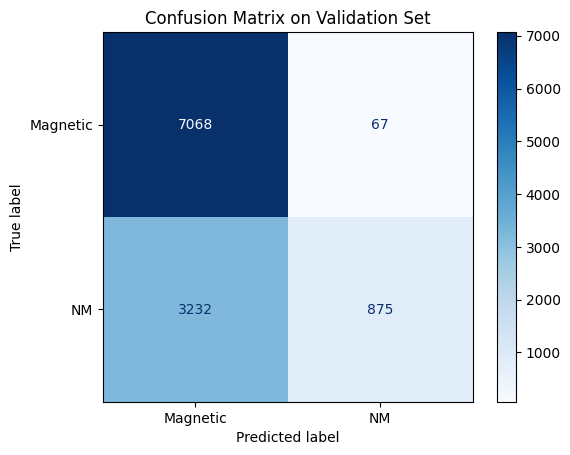

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import re

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3.1 Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 3.2 Label encode 'crystal_system' ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 4. Merge FM and FiM into FerroLike ===
df["ordering"] = df["ordering"].replace({"FM": "Magnetic", "FiM": "Magnetic", "AFM": "Magnetic"})

# === 5. drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma=1, class_weight="balanced"))
])

# === 12. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 13. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 14. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 15. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


Mean CV F1_macro of around 0.56 is poor based on previous experience (see SVM_for_4_Magnetic_Classes). There we got gamma=0.01 to be the best score when we include categorical variables. We check here too.

Train size: 33723, Validation size: 11242, Test size: 11242
4-fold Stratified CV (F1_macro) scores on training set: [0.92660571 0.93234325 0.9306561  0.92840108]
Mean CV F1_macro: 0.9295015350934308
Validation Classification Report:
              precision    recall  f1-score   support

    Magnetic       0.95      0.95      0.95      7135
          NM       0.91      0.92      0.92      4107

    accuracy                           0.94     11242
   macro avg       0.93      0.93      0.93     11242
weighted avg       0.94      0.94      0.94     11242



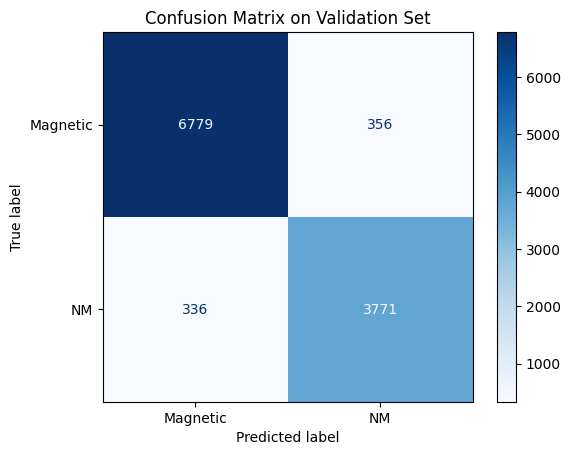

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import re

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3.1 Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 3.2 Label encode 'crystal_system' ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 4. Merge FM, AFM and FiM into Magnetic ===
df["ordering"] = df["ordering"].replace({"FM": "Magnetic", "FiM": "Magnetic", "AFM": "Magnetic"})

# === 5. drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma=0.01, class_weight="balanced"))
])

# === 12. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 13. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 14. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 15. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


Mean CV F1_Macro score of 0.93 is much better. Henceforth, we set C=10 and Gamma=0.01.

Now, we determine feature importance. To do that we need to set Kernel to "linear".

Train size: 33723, Validation size: 11242, Test size: 11242
4-fold Stratified CV (F1_macro) scores on training set: [0.88550011 0.89032011 0.88423491 0.88370323]
Mean CV F1_macro: 0.8859395890067194
Validation Classification Report:
              precision    recall  f1-score   support

    Magnetic       0.93      0.90      0.92      7135
          NM       0.84      0.88      0.86      4107

    accuracy                           0.89     11242
   macro avg       0.88      0.89      0.89     11242
weighted avg       0.90      0.89      0.90     11242



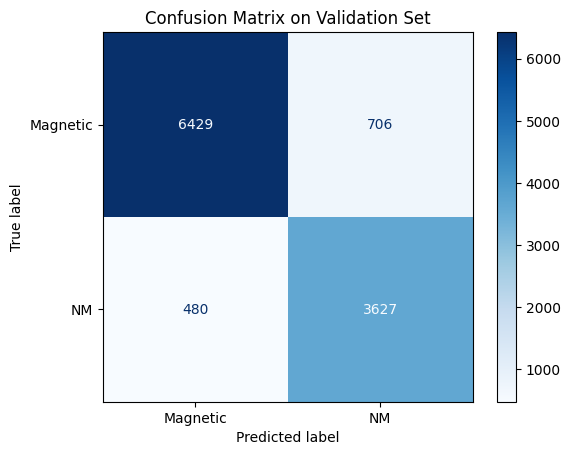

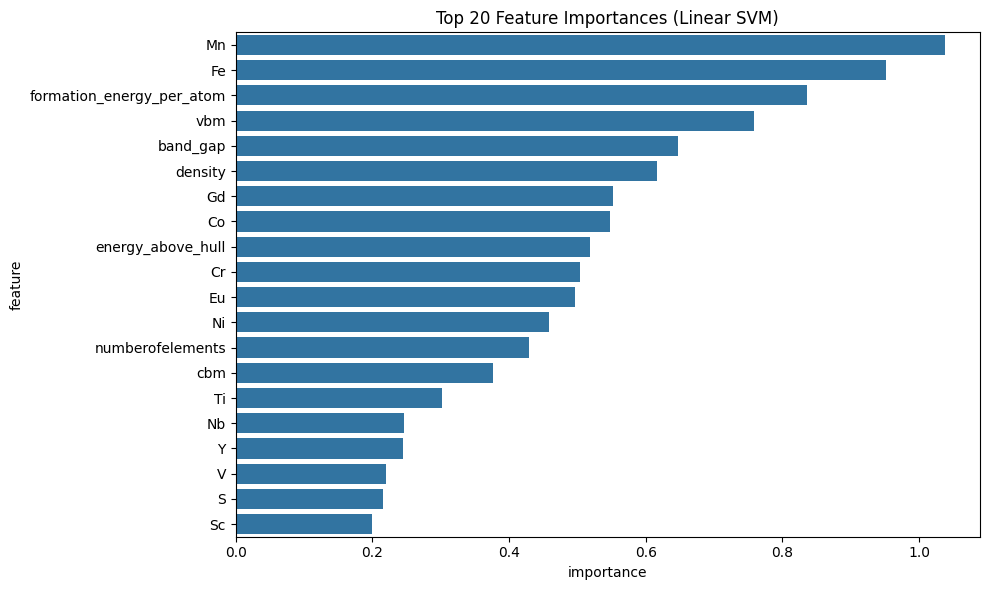

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import re

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3.1 Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 3.2 Label encode 'crystal_system' ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 4. Merge FM, AFM and FiM into Magnetic ===
df["ordering"] = df["ordering"].replace({"FM": "Magnetic", "FiM": "Magnetic", "AFM": "Magnetic"})

# === 5. Drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Define SVM Pipeline with linear kernel ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=10, class_weight="balanced"))
])

# === 12. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 13. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 14. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 15. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()

# === 16. Plot Feature Importance ===
model = svm_pipeline.named_steps["svm"]
feature_names = X.columns
coefs = model.coef_

# Multiclass → take average absolute weight across classes
importance = np.abs(coefs).mean(axis=0)

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importance
}).sort_values(by="importance", ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(20), x="importance", y="feature")
plt.title("Top 20 Feature Importances (Linear SVM)")
plt.tight_layout()
plt.show()


F1_macro score is lower when the kernel is set to linear. Elements seem to be the most important feature.